In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as seabornInstance
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score
from sklearn import metrics
%matplotlib inline
from sklearn.impute import SimpleImputer # import simple imputer
import seaborn as sn

In [2]:
data =pd.read_csv("../Data/final/Anuradapura_demand.csv",index_col="Month",parse_dates=["Month"])
data.head()

,Demand,Temp_Avg,Temp_Max,Temp_Min,Rainfall_Avg,HumidityDay,HumidityNight
Month,,,,,,,
2015-01-01,13.355776,26.7,31.3,22.2,15.8,69,92.0
2015-02-01,12.717279,26.8,31.2,22.3,129.8,71,92.0
2015-03-01,13.780719,28.7,33.6,23.7,26.0,64,89.0
2015-04-01,14.926229,29.2,34.1,24.2,288.2,68,91.0
2015-05-01,15.463069,29.3,33.5,25.1,264.7,73,91.0


In [3]:
data.describe(include='all')

,Demand,Temp_Avg,Temp_Max,Temp_Min,Rainfall_Avg,HumidityDay,HumidityNight
count,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,83.000000
mean,18.291453,28.398810,32.642857,24.151190,114.367857,69.238095,90.397590
std,3.224086,1.349296,1.755356,1.193203,117.104345,6.399584,3.083946
min,8.302096,25.600000,28.600000,20.900000,0.000000,57.000000,83.000000
25%,16.197128,27.150000,31.275000,23.475000,18.500000,65.000000,88.000000
50%,18.773882,28.800000,33.000000,24.350000,73.950000,68.500000,91.000000
75%,20.547705,29.400000,33.925000,25.100000,170.975000,73.250000,92.000000
max,30.408826,31.100000,36.400000,25.900000,463.100000,84.000000,96.000000


In [4]:
data.shape

(84, 7)

In [5]:
data.isnull().sum()

Demand           0
Temp_Avg         0
Temp_Max         0
Temp_Min         0
Rainfall_Avg     0
HumidityDay      0
HumidityNight    1
dtype: int64

In [6]:
sample_data= data.copy()
sample_data.isnull().sum()

Demand           0
Temp_Avg         0
Temp_Max         0
Temp_Min         0
Rainfall_Avg     0
HumidityDay      0
HumidityNight    1
dtype: int64

In [8]:
sample_data.head()

,Demand,Temp_Avg,Temp_Max,Temp_Min,Rainfall_Avg,HumidityDay,HumidityNight
Month,,,,,,,
2015-01-01,13.355776,26.7,31.3,22.2,15.8,69,92.0
2015-02-01,12.717279,26.8,31.2,22.3,129.8,71,92.0
2015-03-01,13.780719,28.7,33.6,23.7,26.0,64,89.0
2015-04-01,14.926229,29.2,34.1,24.2,288.2,68,91.0
2015-05-01,15.463069,29.3,33.5,25.1,264.7,73,91.0


In [9]:
imputer = SimpleImputer(missing_values=np.NaN, strategy='mean') 
sample_data.HumidityNight = imputer.fit_transform(sample_data['HumidityNight'].values.reshape(-1,1))[:,0]

In [10]:
sample_data.isnull().sum()

Demand           0
Temp_Avg         0
Temp_Max         0
Temp_Min         0
Rainfall_Avg     0
HumidityDay      0
HumidityNight    0
dtype: int64

In [11]:
df_required_x=sample_data.drop('Demand',axis=1)
df_required_x.head(5)

,Temp_Avg,Temp_Max,Temp_Min,Rainfall_Avg,HumidityDay,HumidityNight
Month,,,,,,
2015-01-01,26.7,31.3,22.2,15.8,69,92.0
2015-02-01,26.8,31.2,22.3,129.8,71,92.0
2015-03-01,28.7,33.6,23.7,26.0,64,89.0
2015-04-01,29.2,34.1,24.2,288.2,68,91.0
2015-05-01,29.3,33.5,25.1,264.7,73,91.0


<AxesSubplot:>

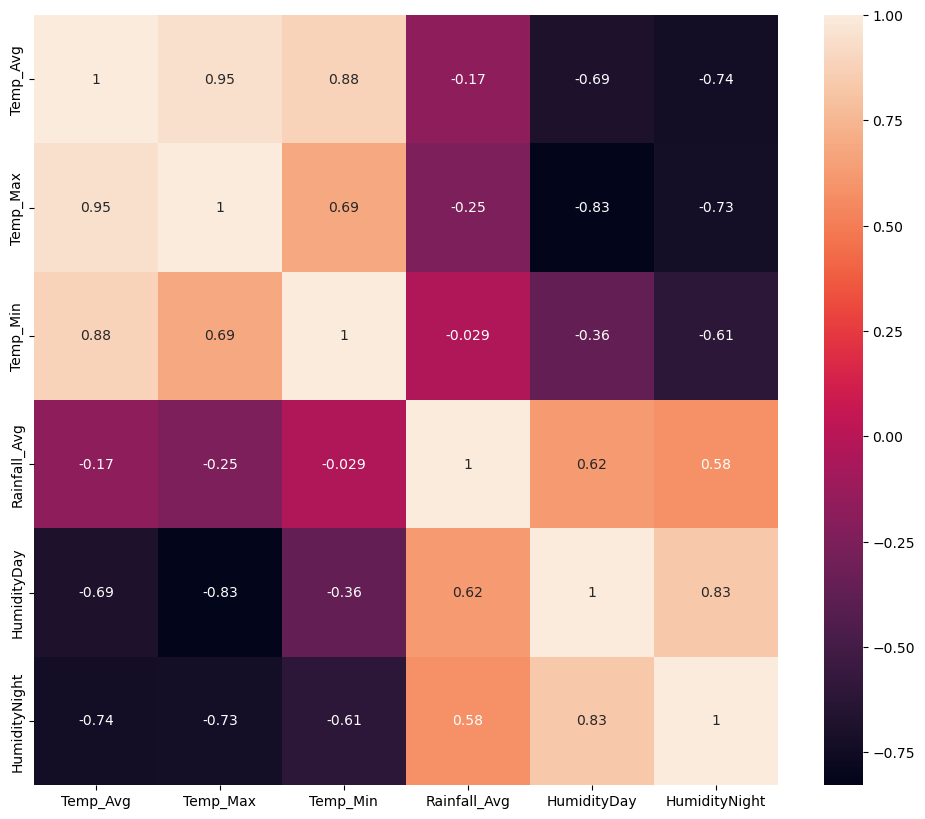

In [12]:
plt.figure(figsize=(12,10))
sn.heatmap(df_required_x.corr(),annot=True)

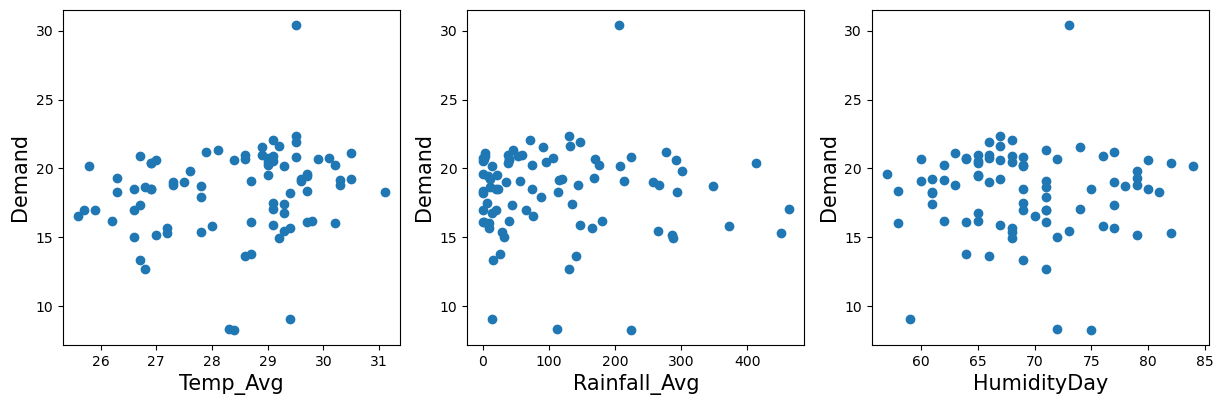

In [14]:
features=['Temp_Avg','Rainfall_Avg','HumidityDay']
plt.figure(figsize=(20,20))
for index,feature_names in enumerate(sample_data[features]):
     plt.subplot(4,4,index+1)
     plt.scatter(sample_data[feature_names],sample_data['Demand'])
     plt.ylabel('Demand',size=15)
     plt.xlabel(feature_names,size=15)  

In [15]:
import statsmodels.api as sm
X=sample_data[features]
y=sample_data['Demand'].values
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=0.20)
model=sm.OLS(y_train,X_train).fit()
predictions=model.predict(X_test)

In [16]:
model=sm.OLS(y,X)
results=model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.972
Model:                            OLS   Adj. R-squared (uncentered):              0.971
Method:                 Least Squares   F-statistic:                              935.3
Date:                Thu, 16 Feb 2023   Prob (F-statistic):                    1.00e-62
Time:                        10:21:01   Log-Likelihood:                         -214.52
No. Observations:                  84   AIC:                                      435.0
Df Residuals:                      81   BIC:                                      442.3
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Temp_Avg         0.4753      0.106      4.505      0.000       0.265       0.685
Rainfall_Avg    -0.0022      0.004     -0.631      0.530      -0.009       0.005
HumidityDay      0.0731      0.046      1.586      0.117      -0.019       0.165
==============================================================================
Omnibus:                       17.203   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.001
Skew:                          -0.596   Prob(JB):                     2.79e-10
Kurtosis:                       6.339   Cond. No.                         57.5
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
sig_var=['Temp_Avg','HumidityDay']
X_train=X_train[sig_var]

In [20]:
model_2=sm.OLS(y_train,X_train).fit()

In [21]:
model_2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                       Results: Ordinary least squares
==============================================================================
Model:                  OLS              Adj. R-squared (uncentered): 0.973   
Dependent Variable:     y                AIC:                         341.3437
Date:                   2023-02-16 10:34 BIC:                         345.7531
No. Observations:       67               Log-Likelihood:              -168.67 
Df Model:               2                F-statistic:                 1227.   
Df Residuals:           65               Prob (F-statistic):          2.40e-52
R-squared (uncentered): 0.974            Scale:                       9.2758  
----------------------------------------------------------------------------------
                   Coef.      Std.Err.       t        P>|t|      [0.025     0.975]
----------------------------------------------------------------------------------
Temp_Avg           0.4517       0.1008     4.4797     0.0000     0.2503     0.6531
HumidityDay        0.0812       0.0406     1.9972     0.0500     0.0000     0.1623
------------------------------------------------------------------------------
Omnibus:                   13.369           Durbin-Watson:              1.846 
Prob(Omnibus):             0.001            Jarque-Bera (JB):           39.536
Skew:                      -0.352           Prob(JB):                   0.000 
Kurtosis:                  6.697            Condition No.:              22    
==============================================================================

"""

<Figure size 800x600 with 0 Axes>

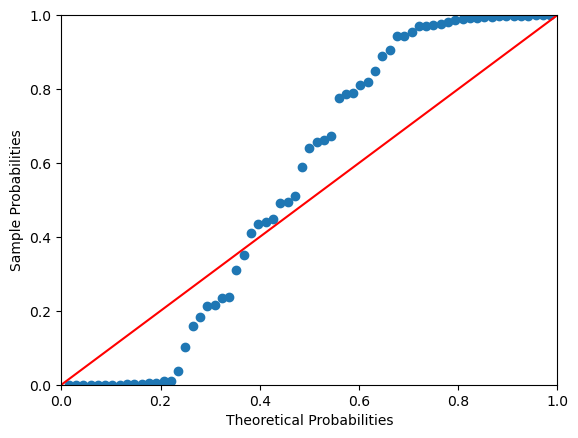

In [22]:
probplot=sm.ProbPlot(model_2.resid)
plt.figure(figsize=(8,6))
probplot.ppplot(line='45')
plt.show()

In [27]:
#prediction
pred=model_2.predict(X_test[sig_var])
pred

Month
2017-07-01    18.728979
2018-05-01    18.916774
2018-08-01    18.376086
2019-03-01    18.042914
2016-11-01    18.537053
2019-07-01    18.376775
2015-03-01    18.159398
2019-09-01    18.700774
2017-03-01    18.276570
2015-09-01    18.583602
2020-10-01    18.294914
2016-02-01    18.077537
2020-07-01    18.763602
2021-06-01    18.664774
2016-05-01    19.151806
2017-04-01    18.719807
2021-04-01    18.764290
dtype: float64

In [28]:
#measuring RMSE
np.sqrt(metrics.mean_squared_error(pred,y_test))

3.59175517515843

In [33]:
#measuring R2
metrics.r2_score(pred,y_test)

-143.60564422815182